In [64]:
import xarray as xr
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Domain

In [58]:
vic_dom = xr.open_dataset("../backend/params/vic/domain.nc")
ms_dom = xr.open_dataset("../backend/params/metsim/domain.nc")

In [59]:
vic_dom

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237)
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    area     (lat, lon) float64 ...
    frac     (lat, lon) float64 ...
    mask     (lat, lon) int32 ...

In [60]:
ms_dom

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237)
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    mask     (lat, lon) float32 ...
    elev     (lat, lon) float64 ...

In [68]:
params = gpd.read_file("../backend/data/ancillary/PARAMS.shp")[['lat', 'lon', 'area_m2']].set_index(['lat', 'lon']).to_xarray()
params

<xarray.Dataset>
Dimensions:  (lat: 388, lon: 237)
Coordinates:
  * lat      (lat) float64 9.594 9.656 9.719 9.781 ... 33.59 33.66 33.72 33.78
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7
Data variables:
    area_m2  (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [75]:
ms_dom['area'] = params['area_m2']
ms_dom['frac'] = vic_dom['frac']

In [80]:
ms_dom['area'].attrs = {'units': 'm2'}

(array([    0.,     0.,     0.,     0.,     0., 17317.,     0.,     0.,
            0.,     0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5],
       dtype=float32),
 <BarContainer object of 10 artists>)

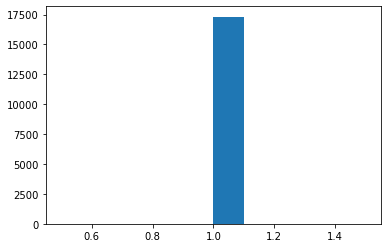

In [81]:
# ms_dom = ms_dom.reindex(lat=np.flip(fdr_ds.lat))
plt.hist(ms_dom.mask.data.flatten())

In [82]:
ms_dom.fillna(0).to_netcdf("../backend/params/rvic/domain.nc")
# ms_dom.to_netcdf("../backend/params/rvic/domain.nc")

# Flow Directions

(array([  20., 2223.,  886., 3319.,    0.,    0., 5405., 1451., 3256.,
         761.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

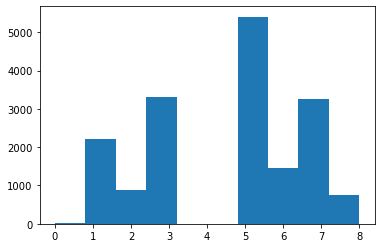

In [83]:
fdr = rio.open("../backend/data/ancillary/DRT_FDR.tif").read(1, masked=True)#.filled(0)
# Remap

fdr[fdr==1] = 3
fdr[fdr==2] = 4
fdr[fdr==4] = 5
fdr[fdr==8] = 6
fdr[fdr==16] = 7
fdr[fdr==32] = 8
fdr[fdr==64] = 1
fdr[fdr==128] = 2

plt.hist(fdr.flatten())

In [84]:
fdr_da = xr.DataArray(fdr, coords=[ms_dom.lat, ms_dom.lon], dims=['lat', 'lon'], name='flow_direction')
fdr_da

<xarray.DataArray 'flow_direction' (lat: 388, lon: 237)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7

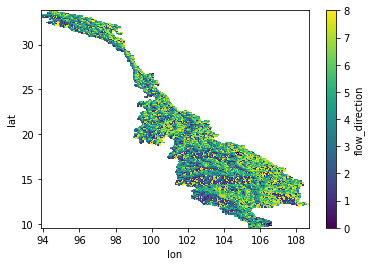

In [85]:
fdr_da.plot()

In [86]:
fds = rio.open("/houston2/pritam/rat_mekong_v3/extras/rvic_try2/Flow_Distance.tif")
fds

<open DatasetReader name='/houston2/pritam/rat_mekong_v3/extras/rvic_try2/Flow_Distance.tif' mode='r'>

In [87]:
fds_ar = fds.read(1, masked=True)#.filled(np.nan)

In [88]:
fds_da = xr.DataArray(fds_ar, coords=[ms_dom.lat, ms_dom.lon], dims=['lat', 'lon'], name='flow_distance')
fds_da

<xarray.DataArray 'flow_distance' (lat: 388, lon: 237)>
array([[5776., 6949., 6949., ..., 6949., 5776., 6949.],
       [9039., 5780., 5780., ..., 9039., 6949., 5780.],
       [5784., 6949., 9042., ..., 6949., 5784., 6949.],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7

In [89]:
# Basins
basin_ar = rio.open("../backend/data/ancillary/Basins_DRT_FDR.tif").read(1, masked=True)

basin_da = xr.DataArray(basin_ar, coords=[ms_dom.lat, ms_dom.lon], dims=['lat', 'lon'], name='basin_ID')
basin_da

<xarray.DataArray 'basin_ID' (lat: 388, lon: 237)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7

In [90]:
# Source Area
src_area_ar = rio.open("../backend/data/ancillary/DRT_Accum.tif").read(1, masked=True)

src_area_da = xr.DataArray(src_area_ar, coords=[ms_dom.lat, ms_dom.lon], dims=['lat', 'lon'], name='source_area')
src_area_da

<xarray.DataArray 'source_area' (lat: 388, lon: 237)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 33.78 33.72 33.66 33.59 ... 9.781 9.719 9.656 9.594
  * lon      (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.5 108.6 108.7

In [91]:
fdr_ds = xr.Dataset(data_vars={
    'flow_direction': fdr_da,
    'flow_distance': fds_da,#.fillna(1),
    'basin_ID': basin_da, # ms_dom.mask,
    'source_area': src_area_da
}).fillna(-9999)#.reindex(lat=list(reversed(fdr_ds.lat)))

# fdr_ds['lat'] = np.flip(fdr_ds.lat)

In [92]:
fdr_ds

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237)
Coordinates:
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
Data variables:
    flow_direction  (lat, lon) float64 -9.999e+03 -9.999e+03 ... -9.999e+03
    flow_distance   (lat, lon) float64 5.776e+03 6.949e+03 ... -9.999e+03
    basin_ID        (lat, lon) float64 -9.999e+03 -9.999e+03 ... -9.999e+03
    source_area     (lat, lon) float32 -9.999e+03 -9.999e+03 ... -9.999e+03

In [48]:
fdr_ds.to_netcdf("../backend/params/rvic/flow_directions.nc")

(array([16771.,    24.,    24.,    29.,   102.,    23.,    26.,    63.,
          201.,    58.]),
 array([  1. ,  20.4,  39.8,  59.2,  78.6,  98. , 117.4, 136.8, 156.2,
        175.6, 195. ]),
 <BarContainer object of 10 artists>)

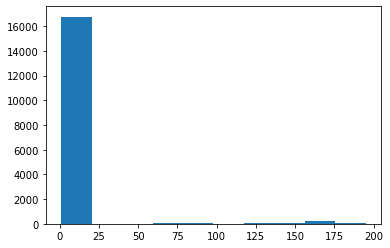

In [101]:
plt.hist(basin_da.data.flatten())

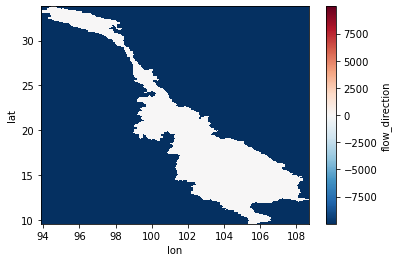

In [97]:
fdr_ds.flow_direction.plot()